# Laptop Price Prediction Using Random Forest Regressor

Importing Libraries

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

In [205]:
 df = pd.read_csv("C:\\Users\\DELL\\Downloads\\laptop_price_prediction\\laptop_data.csv")

In [206]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [208]:
df.shape

(1303, 12)

# Dropping Unecessaruy Column

In [209]:
df.drop(columns=["Unnamed: 0"],inplace=True)

In [210]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Coversion of Ram into float 

In [211]:
df["Ram"] = df["Ram"].astype(str).str.replace('GB', '').astype('int32')


In [212]:
def turn_memory_amount_into_MB(value):
    if isinstance(value, float):
        return value  # Return float values as is
    if "GB" in value:
        return float(value[:value.find("GB")]) * 1000
    if "TB" in value:
        return float(value[:value.find("TB")]) * 1000000
    return None  # Handle other cases if needed

df['Memory'] = df['Memory'].apply(turn_memory_amount_into_MB)


In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   float64
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 107.0+ KB


# Adding a New Column "TouchScreen" for future references

In [214]:
df["Touchscreen"] = df["ScreenResolution"].apply(lambda x :1 if "Touchscreen" in x else 0)
df["Touchscreen"]

0       0
1       0
2       0
3       0
4       0
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: Touchscreen, Length: 1303, dtype: int64

In [215]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128000.0,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128000.0,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256000.0,Intel HD Graphics 620,No OS,1.86kg,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512000.0,AMD Radeon Pro 455,macOS,1.83kg,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256000.0,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080,0


# Coversion of OpsSys to Boolean Values

In [216]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [217]:
df = df.join(pd.get_dummies(df.OpSys))
df = df.drop('OpSys', axis=1)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,Weight,Price,Touchscreen,Android,Chrome OS,Linux,Mac OS X,No OS,Windows 10,Windows 10 S,Windows 7,macOS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128000.0,Intel Iris Plus Graphics 640,1.37kg,71378.6832,0,False,False,False,False,False,False,False,False,True
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128000.0,Intel HD Graphics 6000,1.34kg,47895.5232,0,False,False,False,False,False,False,False,False,True
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256000.0,Intel HD Graphics 620,1.86kg,30636.0000,0,False,False,False,False,True,False,False,False,False
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512000.0,AMD Radeon Pro 455,1.83kg,135195.3360,0,False,False,False,False,False,False,False,False,True
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256000.0,Intel Iris Plus Graphics 650,1.37kg,96095.8080,0,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128000.0,Intel HD Graphics 520,1.8kg,33992.6400,1,False,False,False,False,False,True,False,False,False
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512000.0,Intel HD Graphics 520,1.3kg,79866.7200,1,False,False,False,False,False,True,False,False,False
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64000.0,Intel HD Graphics,1.5kg,12201.1200,0,False,False,False,False,False,True,False,False,False
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1000000.0,AMD Radeon R5 M330,2.19kg,40705.9200,0,False,False,False,False,False,True,False,False,False


In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   float64
 7   Gpu               1303 non-null   object 
 8   Weight            1303 non-null   object 
 9   Price             1303 non-null   float64
 10  Touchscreen       1303 non-null   int64  
 11  Android           1303 non-null   bool   
 12  Chrome OS         1303 non-null   bool   
 13  Linux             1303 non-null   bool   
 14  Mac OS X          1303 non-null   bool   
 15  No OS             1303 non-null   bool   
 16  Windows 10        1303 non-null   bool   


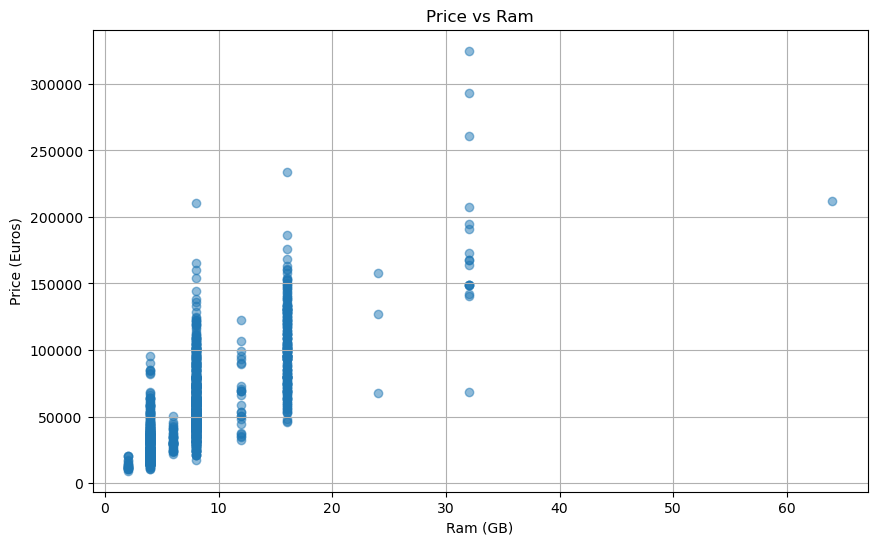

In [219]:
# Scatter plot for Price and Ram columns
plt.figure(figsize=(10, 6))
plt.scatter(df['Ram'], df['Price'], alpha=0.5)
plt.title('Price vs Ram')
plt.xlabel('Ram (GB)')
plt.ylabel('Price (Euros)')
plt.grid(True)
plt.show()


# Random Forest Regressor Algorithm

In [220]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Model 1: Price Prediction Based On RAM & Memory

In [221]:
# Selecting features and target variable
X = df[['Ram', 'Memory']]
y = df['Price']

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [223]:
# Creating the Random Forest Regressor model

model = RandomForestRegressor(n_estimators=100, random_state=42)


In [224]:
# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

In [225]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [226]:
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 539936158.4435215
R^2 Score: 0.6255334004745787


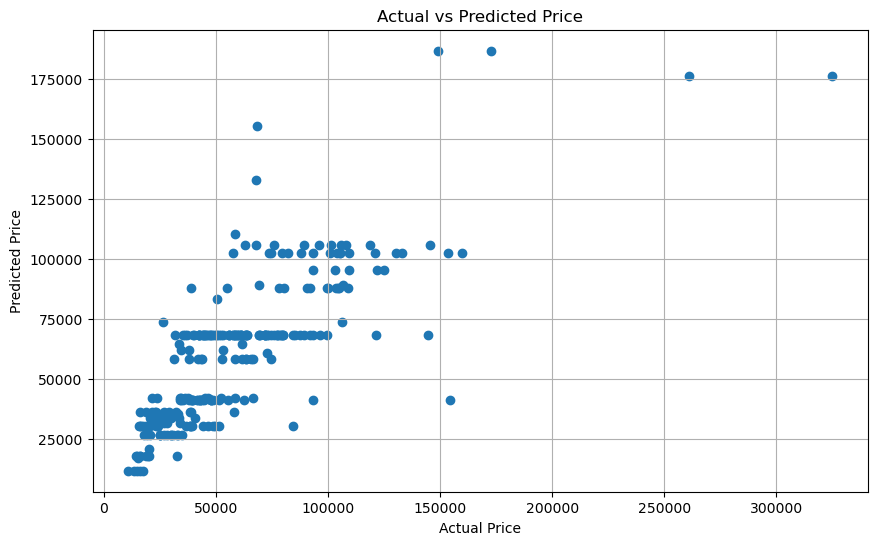

In [227]:
# Plotting the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.grid(True)
plt.show()


#  Model 2: Price Prediction Based On Weight

In [228]:
# Selecting features and target variable
X = df[['Weight']]
y = df['Price']





In [229]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 539936158.4435215
R^2 Score: 0.6255334004745787


#  Model 3: Price Prediction Based On RAM & Company

In [230]:
# Selecting features and target variable
X = df[['Company','Ram']]
y = df['Price']


In [231]:

# Preprocessing the 'Company' column
column_transformer = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

# Creating the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train_encoded, y_train)

# Preprocessing the 'Company' column in the test set
X_test_encoded = column_transformer.transform(X_test)

# Making predictions
y_pred = model.predict(X_test_encoded)


In [232]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 526102631.80831444
R^2 Score: 0.6351274859928804


# Model 4: Price Prediction Based on Inches

In [242]:
# Selecting features and target variable
X = df[['Inches']]
y = df['Price']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 1186854226.4202287
R^2 Score: 0.17687071082414563
